In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

### Building an Image Classifier

In [3]:
tf.__version__

'2.3.0'

In [4]:
keras.__version__

'2.4.0'

In [5]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

**LINK** : https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles
 
 Loads the Fashion-MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

[] 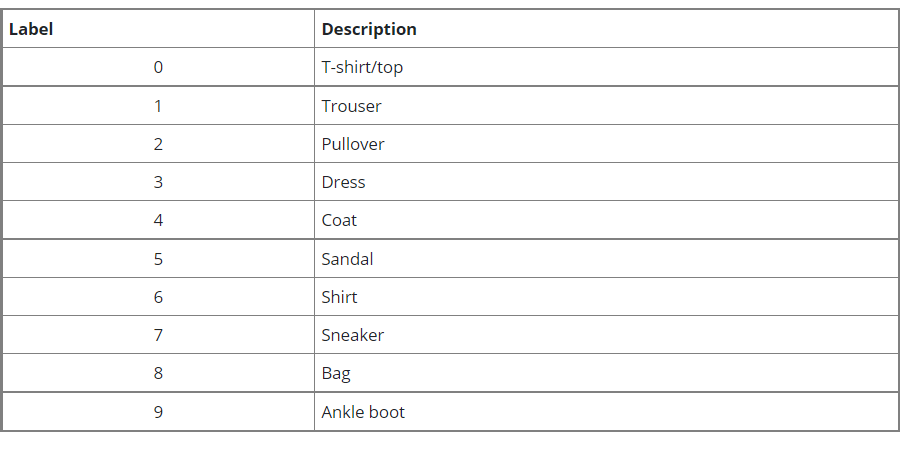

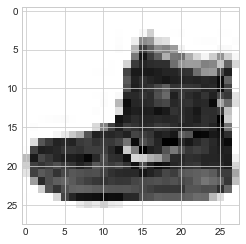

In [6]:
plt.imshow(x_train_full[0])

In [7]:
y_train_full[0]

9

In [8]:
x_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train_full[10]]

'T-shirt/top'

In [11]:
### Data Normalisation

x_train_n=x_train_full/255.0
x_test_n=x_test/255.0

### Split the data into train/validation/test datasets
In the earlier step of importing the data, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [12]:
x_valid,x_train_1=x_train_n[:5000],x_train_n[5000:]
y_valid,y_train_1=y_train_full[:5000],y_train_full[5000:]

In [13]:
x_test=x_test_n

In [14]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


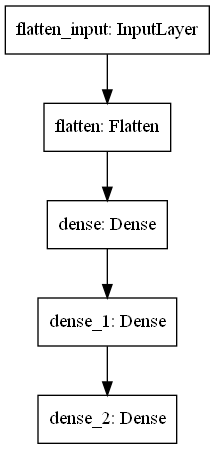

In [18]:
import pydot
keras.utils.plot_model(model)

In [19]:
weight1,biases1=model.layers[1].get_weights()
weight1

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [20]:
weight1.shape

(784, 300)

In [21]:
biases1.shape

(300,)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [23]:
model_history=model.fit(x_train_1,y_train_1,epochs=60,
                       validation_data=(x_valid,y_valid))

Epoch 1/60
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7239 - accuracy: 0.7643 - val_loss: 0.5219 - val_accuracy: 0.8206
Epoch 2/60
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4842 - accuracy: 0.8320 - val_loss: 0.4352 - val_accuracy: 0.8524
Epoch 3/60
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4389 - accuracy: 0.8456 - val_loss: 0.5350 - val_accuracy: 0.7984
Epoch 4/60
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4121 - accuracy: 0.8563 - val_loss: 0.3919 - val_accuracy: 0.8648
Epoch 5/60
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3937 - accuracy: 0.8619 - val_loss: 0.3751 - val_accuracy: 0.8688
Epoch 6/60
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3749 - accuracy: 0.8677 - val_loss: 0.3719 - val_accuracy: 0.8726
Epoch 7/60
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3631 - accuracy: 0.8711 - val_loss: 0.3622 - val_accuracy:

1719/1719 [==============================] - 6s 3ms/step - loss: 0.1445 - accuracy: 0.9490 - val_loss: 0.3005 - val_accuracy: 0.8998
Epoch 58/60
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1418 - accuracy: 0.9502 - val_loss: 0.3009 - val_accuracy: 0.8978
Epoch 59/60
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1403 - accuracy: 0.9503 - val_loss: 0.3120 - val_accuracy: 0.8994
Epoch 60/60
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1381 - accuracy: 0.9513 - val_loss: 0.3066 - val_accuracy: 0.8984


In [24]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1719}

In [25]:
model_history.history

{'loss': [0.7238965630531311,
  0.4841584265232086,
  0.43885383009910583,
  0.4121268391609192,
  0.39366549253463745,
  0.3749418556690216,
  0.3630700409412384,
  0.35156887769699097,
  0.3411632776260376,
  0.3319751024246216,
  0.3240024745464325,
  0.3147030770778656,
  0.30797964334487915,
  0.3019355833530426,
  0.29456961154937744,
  0.2888883650302887,
  0.2839215397834778,
  0.2776336669921875,
  0.272808313369751,
  0.2672886848449707,
  0.26240432262420654,
  0.25757795572280884,
  0.25364652276039124,
  0.24834051728248596,
  0.24411514401435852,
  0.24049851298332214,
  0.23627226054668427,
  0.23259715735912323,
  0.22845612466335297,
  0.22509993612766266,
  0.22095225751399994,
  0.21745142340660095,
  0.21399720013141632,
  0.21043983101844788,
  0.20625321567058563,
  0.20432806015014648,
  0.20080874860286713,
  0.19604817032814026,
  0.19516021013259888,
  0.19118258357048035,
  0.188206285238266,
  0.18553750216960907,
  0.18177665770053864,
  0.17903828620910645

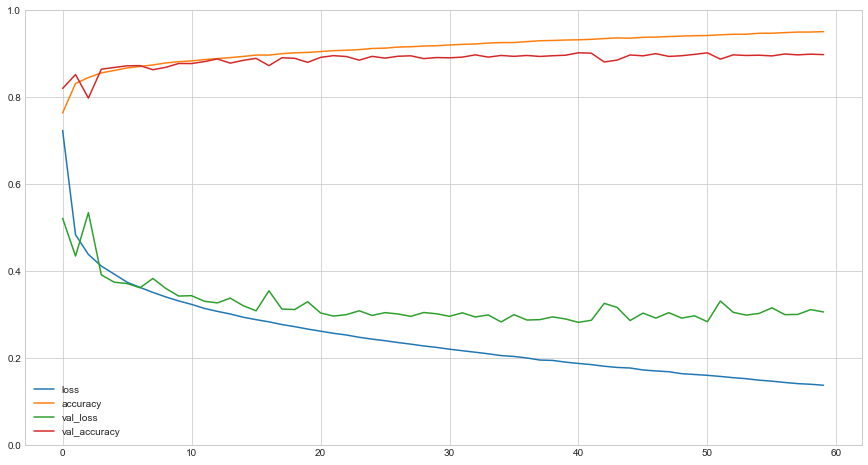

In [26]:
pd.DataFrame(model_history.history).plot(figsize=(15,8))
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8888


[0.34778961539268494, 0.8888000249862671]

In [28]:
x_new=x_test[:3]

In [29]:
y_proba=model.predict(x_new)

In [30]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
y_pred=model.predict_classes(x_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(72,309.207;202.909x197.673)
AxesImage(315.491,309.207;202.909x197.673)
AxesImage(72,72;202.909x197.673)


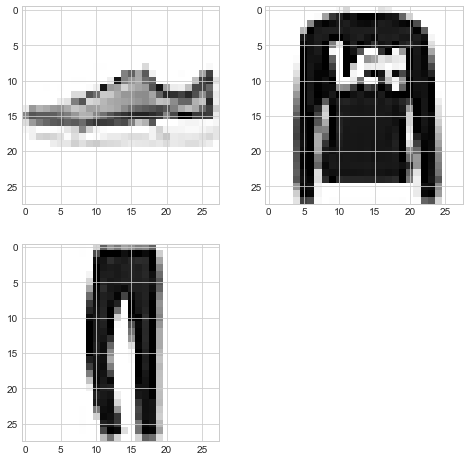

In [33]:
plt.figure(figsize=(8,8))


plt.subplot(2,2,1)
print(plt.imshow(x_test[9]))
plt.subplot(2,2,2)
print(plt.imshow(x_test[1]))
plt.subplot(2,2,3)
print(plt.imshow(x_test[2]))



### Using California Housing Dataset

In [34]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

### Data Set Characteristics:

##### Number of Instances:
 	
20640

##### Number of Attributes:
 	
8 numeric, predictive attributes and the target

##### Attribute Information:
 	
* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California districts.

#### Documentation 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [35]:
housing.target.shape

(20640,)

In [36]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [37]:
from sklearn.model_selection import train_test_split
x_train_h_full,x_test,y_train_h_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
x_train_h,x_valid,y_train_h,y_valid=train_test_split(x_train_h_full,y_train_h_full,random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train_h)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [39]:
model1=keras.models.Sequential([
                                keras.layers.Dense(30,activation="relu",input_shape=x_train.shape[1:]),
                                keras.layers.Dense(10,activation="relu"),
                                keras.layers.Dense(1)])

In [40]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


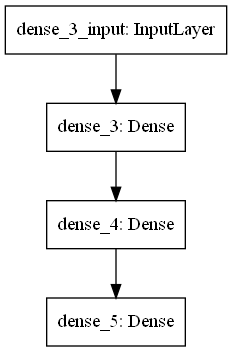

In [41]:
keras.utils.plot_model(model1)

In [42]:
model1.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics="mae")

In [43]:
model1_history=model1.fit(x_train,y_train_h,epochs=50,validation_data=(x_valid,y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 2.2310 - mae: 1.1149 - val_loss: 1.4660 - val_mae: 0.7084
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.7810 - mae: 0.6609 - val_loss: 0.7328 - val_mae: 0.6222
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6762 - mae: 0.6182 - val_loss: 0.6164 - val_mae: 0.5844
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6320 - mae: 0.5939 - val_loss: 0.5852 - val_mae: 0.5710
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5993 - mae: 0.5759 - val_loss: 0.5547 - val_mae: 0.5495
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5702 - mae: 0.5600 - val_loss: 0.5278 - val_mae: 0.5346
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5451 - mae: 0.5452 - val_loss: 0.5052 - val_mae: 0.5204
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [44]:
mae_test=model1.evaluate(x_train,y_train_h)

363/363 [==============================] - 0s 1ms/step - loss: 0.3689 - mae: 0.4339


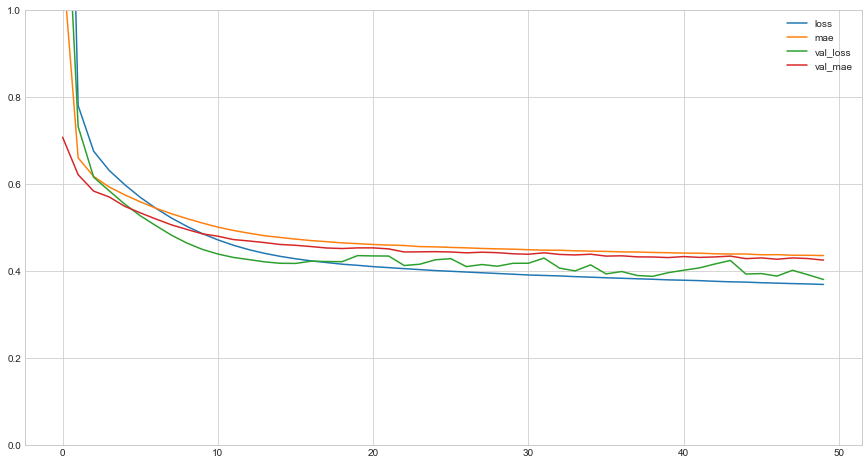

In [45]:
pd.DataFrame(model1_history.history).plot(figsize=(15,8))
plt.gca().set_ylim(0, 1)

plt.show()

In [46]:
x_new=x_test[:3]

In [47]:
print(model1.predict(x_new))
print(y_test[:3])

[[0.99539983]
 [1.9173615 ]
 [3.9535127 ]]
[0.477   0.458   5.00001]


### Using Functional API

In [48]:
input_=keras.layers.Input(shape=x_train.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input_)
hidden2=keras.layers.Dense(10,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model2=keras.models.Model(inputs=[input_],outputs=[output])

In [49]:
model2.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 10)           310         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 18)           0           input_1[0][0]                    
                                                                 dense_7[0][0]         

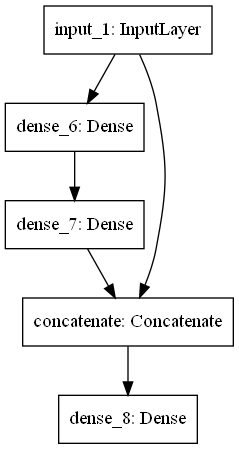

In [50]:
keras.utils.plot_model(model2)

In [73]:
model2.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics="mae")

In [74]:
model2_history=model2.fit(x_train,y_train_h,epochs=50,validation_data=(x_valid,y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3262 - mae: 0.4037 - val_loss: 0.3224 - val_mae: 0.3980
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3265 - mae: 0.4036 - val_loss: 0.3292 - val_mae: 0.4033
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3263 - mae: 0.4039 - val_loss: 0.3219 - val_mae: 0.3980
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3259 - mae: 0.4035 - val_loss: 0.3314 - val_mae: 0.4018
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3264 - mae: 0.4033 - val_loss: 0.3252 - val_mae: 0.4006
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3258 - mae: 0.4038 - val_loss: 0.3165 - val_mae: 0.3959
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3269 - mae: 0.4039 - val_loss: 0.3151 - val_mae: 0.3981
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [75]:
mae_test=model2.evaluate(x_train,y_train_h)

363/363 [==============================] - 0s 1ms/step - loss: 0.3184 - mae: 0.3964


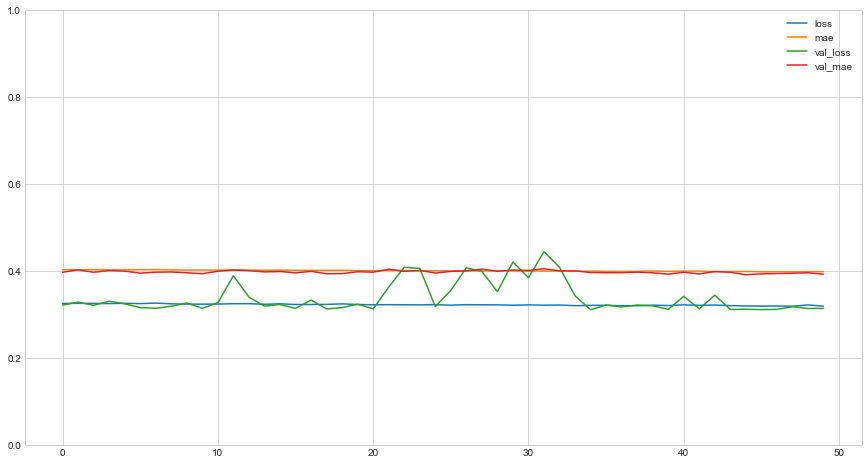

In [76]:
pd.DataFrame(model2_history.history).plot(figsize=(15,8))
plt.gca().set_ylim(0, 1)

plt.show()